In [74]:
import numpy as np
import matplotlib.pyplot as plt

from broadpy import InstrumentalBroadening, RotationalBroadening

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
# load PHOENIX model (R~1e6)
wave, flux = np.loadtxt('data/models_Teff_4300_logg_4.0_Z_+0.0.txt').T # T=4300K, logg=4.0, solar metallicity
# select wavelength region in nm
wave_range = (2320.0, 2330.0)
mask = (wave >= wave_range[0]) & (wave <= wave_range[1])
assert np.any(mask), 'No data in the selected wavelength range'
wave = wave[mask]
flux = flux[mask]

In [76]:
IB = InstrumentalBroadening(wave, flux)
RB = RotationalBroadening(wave, flux)

In [77]:
R = 1e5
fwhm = 2.998e5/R
# Instrumental broadening
flux_fwhm = IB(fwhm=fwhm, kernel='gaussian')
flux_gamma = IB(gamma=1.0, kernel='lorentzian')
n_edge_fwhm = 2 * int(np.mean(wave) / np.mean(np.diff(wave)) / R)

In [80]:
# Rotational broadening
vsini = 5.0
eps = 0.5
flux_vsini = RB(vsini=vsini, epsilon=eps)
flux_vsini_fwhm = InstrumentalBroadening(wave, flux_vsini)(fwhm=fwhm, kernel='gaussian')
flux_vsini_gamma = InstrumentalBroadening(wave, flux_vsini)(gamma=1.0, kernel='lorentzian')

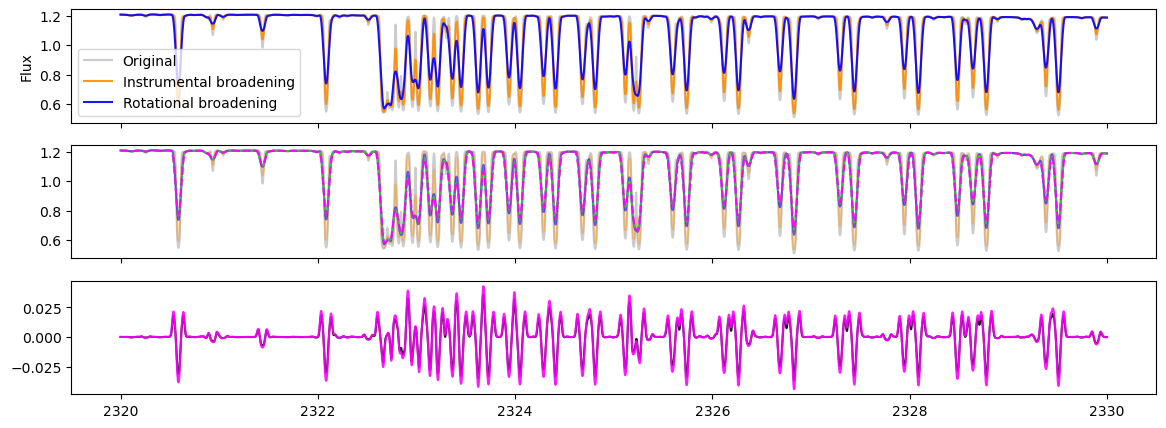

In [81]:
fig, ax = plt.subplots(3, 1, figsize=(14, 5), sharex=True)

for i, axi in enumerate(ax[:2]):
    
    
    axi.plot(wave, flux, label='Original', alpha=0.2, color='black')
    axi.plot(wave, flux_fwhm, label='Instrumental broadening', color='darkorange', alpha=0.9 - 0.5*i)
    axi.plot(wave, flux_vsini, label='Rotational broadening', color='blue', alpha=0.9 - 0.3*i)
    
ax[1].plot(wave, flux_vsini_fwhm, label='Instrumental + Rotational broadening', color='limegreen', alpha=0.9, ls='--')
ax[1].plot(wave, flux_vsini_gamma, label='Instrumental + Rotational broadening', color='magenta', alpha=0.9, ls='--')

# residuals between flux_vsini and flux_vsini_fwhm
res = flux_vsini - flux_vsini_fwhm
ax[-1].plot(wave, res, color='black', alpha=0.9)

res_gamma = flux_vsini - flux_vsini_gamma
ax[-1].plot(wave, res_gamma, color='magenta', alpha=0.9)


ax[0].set_ylabel('Flux')

ax[0].legend()

